In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
productName = []
Ram = []
Rom = []
productPrice = []
rating = []
for i in range(2,15):
    url = 'https://www.flipkart.com/search?q=mobiles&amp;as=on&amp;as-show=on&amp;otracker=AS_Query_TrendingAutoSuggest_1_0_na_na_na&amp;otracker1=AS_Query_TrendingAutoSuggest_1_0&amp;page='+str(i)
    page = requests.get(url,'html.parser')
    soup = BeautifulSoup(page.content, 'html.parser')
    #reviews = []
    box = soup.find('div',class_='_1YokD2 _3Mn1Gg')
    #columns
    names = box.find_all('div',class_ = '_4rR01T')
    storage = box.find_all('ul',class_= '_1xgFaf')
    price_ = box.find_all('div',class_='_30jeq3 _1_WHN1')
    review = box.find_all('div',class_='_3LWZlK')
    #rev = box.find_all('span',class_='_13vcmD')
    for name in names:
        productName.append(name.text)
    for ram in storage:
        Ram.append(ram.text.split('|')[0])
    for rom in storage:
        Rom.append(rom.text.split('|')[1])
    for price in price_:
        productPrice.append(price.text)
    for rat in review:
        rating.append(rat.text)

In [3]:
len(productName)

312

In [4]:
len(Ram)

312

In [5]:
len(Rom)

312

In [6]:
len(productPrice)

312

In [7]:
len(rating)

288

# Createing DataFrame

In [8]:
phone = pd.DataFrame({'ProductName':productName,'Ram':Ram,'Rom':Rom,'productPrice':productPrice},)

In [9]:
phone['rating'] = pd.Series(rating)

In [10]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductName   312 non-null    object
 1   Ram           312 non-null    object
 2   Rom           312 non-null    object
 3   productPrice  312 non-null    object
 4   rating        288 non-null    object
dtypes: object(5)
memory usage: 12.3+ KB


In [11]:
phone.head()

,ProductName,Ram,Rom,productPrice,rating
0,"realme C30 (Denim Black, 32 GB)",2 GB RAM,32 GB ROM,"₹5,749",4.3
1,"realme C30 (Bamboo Green, 32 GB)",2 GB RAM,32 GB ROM,"₹5,749",4.3
2,"realme C30 (Lake Blue, 32 GB)",2 GB RAM,32 GB ROM,"₹5,749",4.3
3,"realme C30 (Denim Black, 32 GB)",3 GB RAM,32 GB ROM,"₹6,749",4.1
4,"POCO M4 5G (Cool Blue, 64 GB)",4 GB RAM,64 GB ROM,"₹12,999",4.2


In [12]:
phone['rating'].fillna(0.0,inplace=True)

In [13]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductName   312 non-null    object
 1   Ram           312 non-null    object
 2   Rom           312 non-null    object
 3   productPrice  312 non-null    object
 4   rating        312 non-null    object
dtypes: object(5)
memory usage: 12.3+ KB


In [14]:
phone['rating']=phone['rating'].astype(float)

In [15]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductName   312 non-null    object 
 1   Ram           312 non-null    object 
 2   Rom           312 non-null    object 
 3   productPrice  312 non-null    object 
 4   rating        312 non-null    float64
dtypes: float64(1), object(4)
memory usage: 12.3+ KB


In [16]:
for i in range(0,len(phone['productPrice'])):
    price = phone['productPrice'][i].replace(',','')
    price_ = price.replace('₹','')
    phone['productPrice'][i] = price_

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11752\1590966778.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phone['productPrice'][i] = price_


In [17]:
phone['productPrice']=phone['productPrice'].astype('int')

In [18]:
phone.tail()

,ProductName,Ram,Rom,productPrice,rating
307,"POCO C55 (Cool Blue, 64 GB)",4 GB RAM,64 GB ROM,8499,0.0
308,"POCO C55 (Power Black, 128 GB)",6 GB RAM,128 GB ROM,9999,0.0
309,"APPLE iPhone 14 Plus (Midnight, 128 GB)",128 GB ROM17.02 cm (6.7 inch) Super Retina XDR...,"12MP Front CameraA15 Bionic Chip, 6 Core Proc...",76999,0.0
310,"POCO C31 (Royal Blue, 64 GB)",4 GB RAM,64 GB ROM,7499,0.0
311,"realme C55 (Rainy Night, 64 GB)",4 GB RAM,64 GB ROM,10999,0.0


In [19]:
import seaborn as sns

<AxesSubplot:xlabel='rating', ylabel='count'>

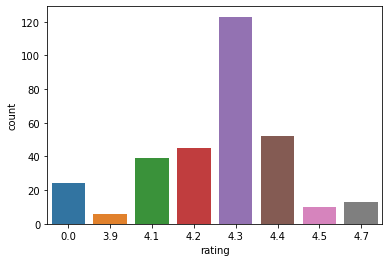

In [20]:
sns.countplot(data=phone,x='rating')

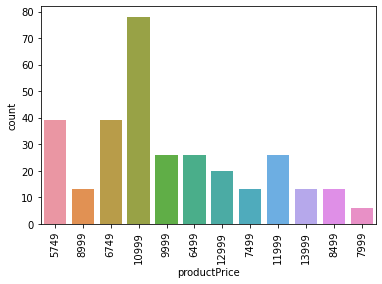

In [244]:
sns.countplot(data=phone,x='productPrice')
plt.xticks(rotation=90);

<AxesSubplot:xlabel='Ram', ylabel='productPrice'>

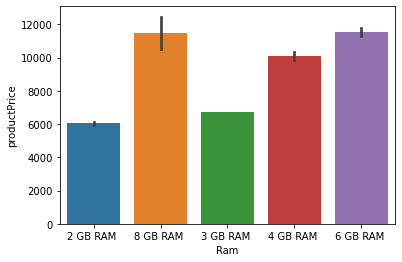

In [250]:
sns.barplot(data=phone,x='Ram',y='productPrice')

In [24]:
# sns.barplot(data=phone,x='Rom',y='productPrice')
# plt.xticks(rotation=90);

<AxesSubplot:xlabel='Ram', ylabel='productPrice'>

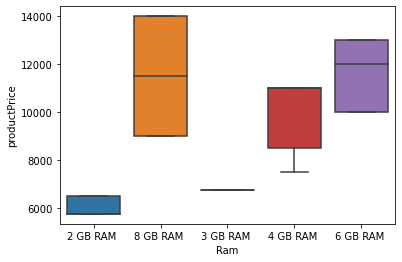

In [256]:
sns.boxplot(data=phone,y='productPrice',x='Ram')

<AxesSubplot:xlabel='Rom', ylabel='productPrice'>

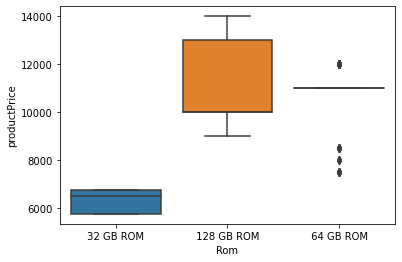

In [257]:
sns.boxplot(data=phone,y='productPrice',x='Rom')

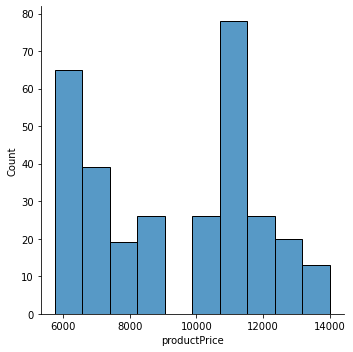

In [265]:
sns.displot(data=phone,x='productPrice')

<AxesSubplot:xlabel='productPrice', ylabel='Density'>

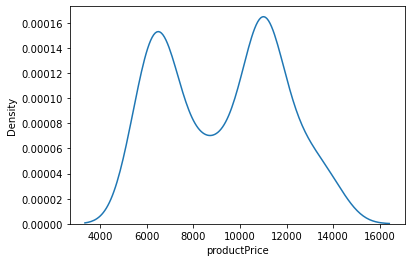

In [267]:
sns.kdeplot(data=phone,x='productPrice')

<AxesSubplot:ylabel='rating'>

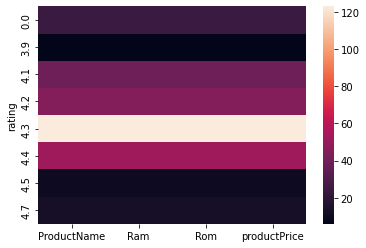

In [30]:
sns.heatmap(phone.groupby('rating').count())